In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Cargamos el archivo y usamos pandas para abrirlo. Lo primero que vamos a hacer es prepararlo para usar.

In [2]:
datos=pd.read_excel("/content/flete-aereo-vacunas-covid19-al-2021-06-28.xlsx")

In [3]:
data = datos.drop(datos.index[0:4])
new_header=datos.iloc[3]
data.columns=new_header

In [4]:
df=data.drop(data.index[70:])

In [5]:
df.rename(columns={"vuelo ": "nro_vuelo"}, inplace=True)

In [6]:
df

3,organismo,expediente,financiamiento,acto_conclusión,descripción,prestador,CUIT,estado,factura_nro,factura_moneda_monto,guía_nro,guía_moneda_monto,fecha_guía,nro_vuelo,bienes_transportados,proveedor_bienes_transportados,operación,comprador_donante,origen
4,Ministerio de Salud de la Nación,EX-2020-91578184- -APN-DD#MS,Fuente Financiamiento 11,DI-2021-16691129-APN-SSGA#MS,Flete aéreo,Aerolíneas Argentinas S.A.,30-64140555-4,Cumplido,0411-00011116,"USD 305.250,00",044-44032951,"USD 679,84",2020-12-23 00:00:00,1061,marking,Biointegrator LLC,Adquisición,Secretaría de Acceso a la Salud,Rusia
5,Ministerio de Salud de la Nación,EX-2020-91578184- -APN-DD#MS,Fuente Financiamiento 11,DI-2021-16691129-APN-SSGA#MS,Flete aéreo,Aerolíneas Argentinas S.A.,30-64140555-4,Cumplido,0411-00011116,"USD 302.250,00",044-44032940,"USD 304.570,16",2020-12-23 00:00:00,1061,vaccine pharmaceuticals,Human Vaccine LLC,Adquisición,Secretaría de Acceso a la Salud,Rusia
6,Ministerio de Salud de la Nación,EX-2021-04601170- -APN-DD#MS,Fuente Financiamiento 11,DI-2021-24666588-APN-SSGA#MS,Flete aéreo,Aerolíneas Argentinas S.A.,30-64140555-4,Cumplido,0411-00011206,"USD 302.250,00",044-44032973,"USD 302.250,00",2021-01-15 00:00:00,1061,vaccine pharmaceuticals,Human Vaccine LLC,Adquisición,Secretaría de Acceso a la Salud,Rusia
7,Ministerio de Salud de la Nación,EX-2021-08460702- -APN-DD#MS,Fuente Financiamiento 11,DI-2021-24639513-APN-SSGA#MS,Flete aéreo,Aerolíneas Argentinas S.A.,30-64140555-4,Cumplido,0411-00011296,NaN,044-44032984,"USD 268.655,94",2021-01-29 00:00:00,1063,vaccine pharmaceuticals,Human Vaccine LLC,Adquisición,Secretaría de Acceso a la Salud,Rusia
8,Ministerio de Salud de la Nación,EX-2021-13211127- -APN-DD#MS,Fuente Financiamiento 11,DI-2021-24642675-APN-SSGA#MS,Flete aéreo,Aerolíneas Argentinas S.A.,30-64140555-4,Cumplido,0411-00011370,"USD 303.075,00",044-44032995,"USD 303.075,00",2021-02-11 00:00:00,1065,vaccine pharmaceuticals,Human Vaccine LLC,Adquisición,Secretaría de Acceso a la Salud,Rusia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Ministerio de Salud de la Nación,EX-2021-56849335- -APN-DD#MS,Fuente Financiamiento 13,sin acto de conclusión,Flete aéreo,Aerolíneas Argentinas S.A.,30-64140555-4,Cumplido,0411-00011904,USD 428.000,044-44033275,USD 428.000,2021-06-22 00:00:00,1067,sars-cov-2 vaccine (vero cell),Beijin Institute of Biological Phroducts co.,Adquisición,Secretaría de Acceso a la Salud,China
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


a. Calcular el porcentaje de cada vuelo y verificar que la suma de los mismos sea
1


In [7]:
vuelo=df[['nro_vuelo','origen']]
vuelo

3,nro_vuelo,origen
4,1061,Rusia
5,1061,Rusia
6,1061,Rusia
7,1063,Rusia
8,1065,Rusia
...,...,...
69,1067,China
70,NaN,NaN
71,NaN,NaN
72,NaN,NaN


In [8]:
cant_vuelos_total=vuelo["nro_vuelo"].count()
avion=vuelo.groupby(["nro_vuelo"]).count()
porcenta=avion/cant_vuelos_total
valores=(porcenta*100)

In [9]:
valores.sum()

3
origen    100.0
dtype: float64

Vemos que la suma es 100 por lo tanto esta bien realizado

In [10]:
valores

3,origen
nro_vuelo,
1051,11.111111
1061,23.809524
1063,19.047619
1065,14.285714
1067,6.349206
1069,4.761905
1081,9.523810
1501,3.174603
KL701,1.587302


b. Calcular el promedio de lo facturado usando la columna factura_moneda_monto .
Realizar un boxplot para con estos datos para entender la distribución de los
mismos.


In [62]:
dinero=df[["factura_moneda_monto"]]
monto=dinero["factura_moneda_monto"].str.replace("USD","")

In [66]:
monto=monto.str.replace("EUR","")
monto=monto.str.replace(",","")
monto=monto.str.replace(".","")
monto=monto.str.replace(" ","")
monto=monto.fillna(0)
monto=monto.astype(int)

<ipython-input-66-d7f5c18c957e>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  monto=monto.str.replace(".","")


In [67]:
monto

4     30525000
6     30225000
7            0
8     30307500
10    42800000
        ...   
69      428000
70           0
71           0
72           0
73           0
Name: factura_moneda_monto, Length: 64, dtype: int64

In [71]:
monto.mean()

17449100.796875

El promedio gastado es de: **17.449.100.79** dolares por viaje

In [74]:
lista_montos=monto.to_list()

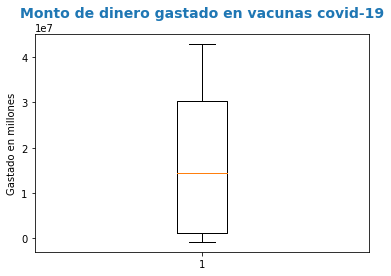

In [81]:
fig, ax = plt.subplots()
ax.set_title('Monto de dinero gastado en vacunas covid-19', loc='center', fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'} )
ax.set_ylabel('Gastado en millones')
ax.boxplot(lista_montos)
plt.show()

c. Informar cuándo fue el último vuelo


In [26]:
vuelos=pd.to_datetime(df["fecha_guía"])
primer_vuelo=vuelos.min()
ultimo_vuelo=vuelos.max()

EL ultimo vuelo que se realizo para buscar vacunas de covid-19 fue el **22 de junio de 2021**

d. Calcular la cantidad de días que pasaron entre el primer y el último vuelo


In [27]:
dias_pasaron = (ultimo_vuelo - primer_vuelo).days
dias_pasaron

181

Desde el primer al ultimo vuelo pasaron **181 dias** de diferencia

c. Pasar a parquet


In [61]:
df.to_parquet('/content/flete-aereo-vacunas-covid19-al-2021-06-28.xlsx.parquet')